<h1 align='center'> COMP2420/COMP6420 - Introduction to Data Management,<br/> Analysis and Security</h1>

<h1 align='center'> Assignment - 1</h1>

-----
<br/>

## Grading

|**Maximum Marks**         |**100**
|--------------------------|--------
|  **Weight**              |  **10% of the Total Course Grade**
|  **Submission deadline** |  **7:00PM, Thursday, April 4**
|  **Submission mode**     |  **Electronic, Using GitLab**
|  **Estimated time**      |  **10 hours**
|  **Penalty**             |  **100% after the deadline**
  


## Submission

You need to submit the notebook `Assignment-1.ipynb` as part of your submission by pushing it to your forked GitLab repository. You need to add your student details below. Any changes to file name will mean your file can't be marked by the auto-grader, resulting in a `zero mark`.


### Note:

* It is strongly advised to read the whole assignment before attempting it and have at least a cursory glance at the dataset in order to gauge the requirements and understand what you need to do as a bigger picture.

* For answers requiring free form written text, use the designated cells denoted by `YOUR ANSWER HERE` -- double click on the cell to write inside them.

* For all coding questions please write your code after the comment `YOUR CODE HERE`.

* In the process of testing your code, you can insert more cells or use print statements for debugging, but when submitting your file remember to remove these cells and calls respectively.

* You will be marked on **correctness** and **readability** of your code, if your marker can't understand your code your marks may be deducted. 

<span style="color:blue">
    
### Student ID :  u6742441

### Student Name: Prateek Arora
</span>

## Introduction

**Bicycle Sharing Systems** are a healthy, cheap and green way to navigate between one place to another. Now with the new generation of electronic registration and sharing, the whole process of transportation, right from the membership to the rental and returning back has become convenient and automatic. Through these systems, user is able to easily rent a bike from a particular position and return back at another position. Bike sharing companies like **Mobike**, **OBike** and **AirBike** have grown pretty popular throughout Australia in the past few years, due to them being environment-friendly, pro-health and not to mention, a cheap and convenient mode of transport.

Apart from interesting real world applications of bike sharing systems, the characteristics of data being generated by these systems make them attractive for research. Opposed to other transport services such as bus or subway, the **duration of travel**, **departure** and **arrival position** is explicitly recorded in these systems. This feature turns bike sharing system into a virtual sensor network that can be used for sensing mobility in the city. Hence, it is expected that most of important events in the city could be detected via monitoring these data.

## Data

You have been given a file named **bike-share.csv** which contains a dataset of two years of historical log corresponding to years 2011 and 2012 from **Capital Bikeshare** System, Washington D.C., USA. The dataset has 15 attributes such as **date**, **weekday/weekend/public holiday**, **weather situation**, **temperature** and **the count of number of bikes rented on that day**. Based on this data, our primary aim in this assignment is to visualise and analyse any insights we can get from this data and then predict a trend in the bike rentals.


_Refer to **bike-share-README.txt** for more information on the various attributes present in this data._

In [1]:
# IMPORTING FREQUENTLY USED PYTHON MODULES
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
plt.style.use('seaborn-notebook')
%matplotlib inline

# JUST TO MAKE SURE SOME WARNINGS ARE IGNORED 
import warnings
warnings.filterwarnings("ignore")

In [2]:
# IMPORT ANY OTHER REQUIRED MODULES IN THIS CELL
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

## LOAD THE DATA

Load the data into a Pandas DataFrame and make it ready for use for analysis and visualization.<span style= 'float: right;'><b>[5 marks]</b></span>

**HINTS** -
* You might need to split some columns into two or combine two columns into one to make them more useful from an analysis point-of-view.
* You might need to rename some columns so that they make sense to you.
* You might need to cast some of the columns into their appropriate datatypes and/or remove any unnecessary characters that may hinder computation.

In [3]:
# YOUR CODE HERE
data_df = pd.read_csv("bike-share.csv")
data_df = data_df.rename(columns= {'instant':'current_index','yr':'year','dteday':'current_date','weathersit':'weather_situation','mnth':'month','hum':'humidity','casual':'count_of_casual_users','registered':'count_of_registered_users','cnt':'count_of_total_rental_bikes'})
data_df['weather_situation'].replace(1,'Clear', inplace  = True)
data_df['weather_situation'].replace(2,'Cloudy', inplace  = True)
data_df['weather_situation'].replace(3,'Light_Rain', inplace  = True)
data_df['weather_situation'].replace(4,'Heavy_Rain', inplace  = True)
data_df['season'].replace(1,"Spring", inplace = True)
data_df['season'].replace(2,"Summer", inplace = True)
data_df['season'].replace(3,"Fall", inplace = True)
data_df['season'].replace(4,"Winter", inplace = True)
data_df['year'].replace(0,2011, inplace = True)
data_df['year'].replace(1,2012, inplace = True)
data_df['holiday'].replace(0,"No", inplace = True)
data_df['holiday'].replace(1,"Yes", inplace = True)
data_df['workingday'].replace(0,"No", inplace = True)
data_df['workingday'].replace(1,"Yes", inplace = True)
data_df['weekday'].replace(0,"Sunday", inplace = True)
data_df['weekday'].replace(1,"Monday", inplace = True)
data_df['weekday'].replace(2,"Tuesday", inplace = True)
data_df['weekday'].replace(3,"Wednesday", inplace = True)
data_df['weekday'].replace(4,"Thursday", inplace = True)
data_df['weekday'].replace(5,"Friday", inplace = True)
data_df['weekday'].replace(6,"Saturday", inplace = True)
data_df['temp']*= 41
data_df['atemp']*= 50
data_df['humidity']*= 100
data_df['windspeed']*= 67

data_df
# (ADD ANY ADDITIONAL CELLS AS REQUIRED

,current_index,current_date,season,year,month,holiday,weekday,workingday,weather_situation,temp,atemp,humidity,windspeed,count_of_casual_users,count_of_registered_users,count_of_total_rental_bikes
0,1,2011-01-01,Spring,2011,1,No,Saturday,No,Cloudy,14.110847,18.181250,80.5833,10.749882,331,654,985
1,2,2011-01-02,Spring,2011,1,No,Sunday,No,Cloudy,14.902598,17.686950,69.6087,16.652113,131,670,801
2,3,2011-01-03,Spring,2011,1,No,Monday,Yes,Clear,8.050924,9.470250,43.7273,16.636703,120,1229,1349
3,4,2011-01-04,Spring,2011,1,No,Tuesday,Yes,Clear,8.200000,10.606100,59.0435,10.739832,108,1454,1562
4,5,2011-01-05,Spring,2011,1,No,Wednesday,Yes,Clear,9.305237,11.463500,43.6957,12.522300,82,1518,1600
5,6,2011-01-06,Spring,2011,1,No,Thursday,Yes,Clear,8.378268,11.660450,51.8261,6.000868,88,1518,1606
6,7,2011-01-07,Spring,2011,1,No,Friday,Yes,Cloudy,8.057402,10.441950,49.8696,11.304642,148,1362,1510
7,8,2011-01-08,Spring,2011,1,No,Saturday,No,Cloudy,6.765000,8.112700,53.5833,17.875868,68,891,959
8,9,2011-01-09,Spring,2011,1,No,Sunday,No,Clear,5.671653,5.808750,43.4167,24.250650,54,768,822
9,10,2011-01-10,Spring,2011,1,No,Monday,Yes,Clear,6.184153,7.544400,48.2917,14.958889,41,1280,1321


<span style="color:blue">
    Here, many names of the columns were changed so that it could be made relevant to the readers.The names were changed from
    instant to current_index, dteday to current_date, yr to year, mnth to month, weathersit to weather_situation, hum to humidity, casual to count_of_casual_users , 
    registered to count_of_registered users and cnt to count_of_total_users.
    The values of weather_situation has been changed:
        1 - Clear
        2 - Cloudy
        3 - Light Rain
        4 - Heavy Rain
    The values of weekdays has been changed to Monday, Tuesday, Wednesday, Thursday, Friday, Saturday and Sunday
    The values of hoildays and working_day have been changed to either yes or no
    Temperature, feel_like_temperature, humidity and windspeed are multiplied by their normalized values.
</span>

## EXPLORATORY DATA ANALYSIS

In this section you are expected to do an exploratory data analysis on the dataset that you've just loaded and readied. <span style= 'float: right;'><b>[15 marks]</b></span>

**HINTS** -

* Explore your data both statistically and visually, in order to find some statistical insights about your data.
* Announce some descriptive stats on your data and explain what they mean in the context of this dataset.

64.36647671232876
61.21664480874321


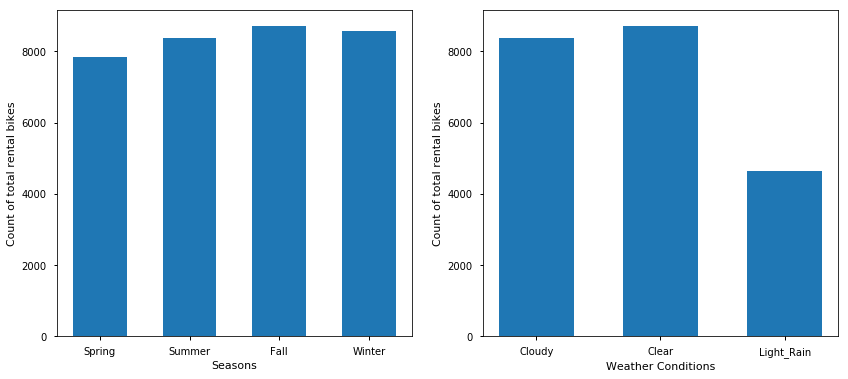

In [4]:
# YOUR CODE HERE
#data_df.T.plot(kind='bar')
fig2 = plt.figure(figsize=(14,6))
ax1 = fig2.add_subplot(121)
ax1.bar(data_df['season'],data_df['count_of_total_rental_bikes'], width = 0.6)
ax1.set_xlabel("Seasons")
ax1.set_ylabel("Count of total rental bikes")
ax2 = fig2.add_subplot(122)
ax2.bar(data_df['weather_situation'],data_df['count_of_total_rental_bikes'], width = 0.6)
ax2.set_xlabel("Weather Conditions")
ax2.set_ylabel("Count of total rental bikes")
temp1 = data_df['humidity'][0:365].mean()
temp2 = data_df['humidity'][365:].mean()
print(temp1)
print(temp2)
# (ADD ANY ADDITIONAL CELLS AS REQUIRED)

In [5]:
Spring_data=data_df['count_of_total_rental_bikes'][0:79].mean() + data_df['count_of_total_rental_bikes'][354:445].mean()
Summer_data=data_df['count_of_total_rental_bikes'][79:171].mean() + data_df['count_of_total_rental_bikes'][445:537].mean()
Fall_data=data_df['count_of_total_rental_bikes'][171:265].mean() + data_df['count_of_total_rental_bikes'][537:631].mean()
Winter_data=data_df['count_of_total_rental_bikes'][265:354].mean() + data_df['count_of_total_rental_bikes'][631:].mean()
print("Mean_of_rent_bikes_in_Spring_Season_2011_and_2012: ",Spring_data)
print("Mean_of_rent_bikes_in_Summer_Season_2011_and_2012: ",Summer_data)
print("Mean_of_rent_bikes_in_Fall_Season_2011_and_2012: ",Fall_data)
print("Mean_of_rent_bikes_in_Winter_Season_2011_and_2012: ",Winter_data)

Mean_of_rent_bikes_in_Spring_Season_2011_and_2012:  5166.195576575324
Mean_of_rent_bikes_in_Summer_Season_2011_and_2012:  9984.663043478262
Mean_of_rent_bikes_in_Fall_Season_2011_and_2012:  11288.606382978724
Mean_of_rent_bikes_in_Winter_Season_2011_and_2012:  9025.300674157304


Mean_of_rent_bikes_in _2011:  3405.7616438356163
Mean_of_rent_bikes_in _2012:  5599.934426229508


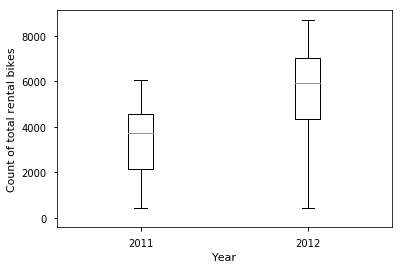

In [6]:
df_yes = data_df[data_df['year'] == 2011]
df_no = data_df[data_df['year'] == 2012]
plt.boxplot([list(df_yes['count_of_total_rental_bikes']), list(df_no['count_of_total_rental_bikes'])], labels = ["2011" , "2012"])
data_2011=data_df['count_of_total_rental_bikes'][0:365].mean()
data_2012=data_df['count_of_total_rental_bikes'][365:].mean()
plt.xlabel("Year")
plt.ylabel("Count of total rental bikes")
print("Mean_of_rent_bikes_in _2011: ",data_2011)
print("Mean_of_rent_bikes_in _2012: ",data_2012)

Text(0, 0.5, 'Count of total rental bikes')

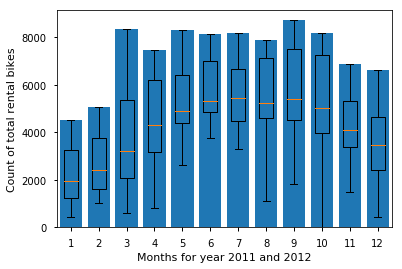

In [7]:
plt.bar(data_df['month'],data_df['count_of_total_rental_bikes'])
df_jan = data_df[data_df['month'] == 1]
df_feb = data_df[data_df['month'] == 2]
df_mar = data_df[data_df['month'] == 3]
df_apr = data_df[data_df['month'] == 4]
df_may = data_df[data_df['month'] == 5]
df_jun = data_df[data_df['month'] == 6]
df_jul = data_df[data_df['month'] == 7]
df_aug = data_df[data_df['month'] == 8]
df_sep = data_df[data_df['month'] == 9]
df_oct = data_df[data_df['month'] == 10]
df_nov = data_df[data_df['month'] == 11]
df_dec = data_df[data_df['month'] == 12]
plt.boxplot([list(df_jan['count_of_total_rental_bikes']), list(df_feb['count_of_total_rental_bikes']), list(df_mar['count_of_total_rental_bikes']), list(df_apr['count_of_total_rental_bikes']), list(df_may['count_of_total_rental_bikes']), list(df_jun['count_of_total_rental_bikes']), list(df_jul['count_of_total_rental_bikes']), list(df_aug['count_of_total_rental_bikes']), list(df_sep['count_of_total_rental_bikes']), list(df_oct['count_of_total_rental_bikes']), list(df_nov['count_of_total_rental_bikes']), list(df_dec['count_of_total_rental_bikes'])], labels = [1,2,3,4,5,6,7,8,9,10,11,12])
plt.xlabel("Months for year 2011 and 2012")
plt.ylabel("Count of total rental bikes")

Text(0, 0.5, 'Count of total rental bikes')

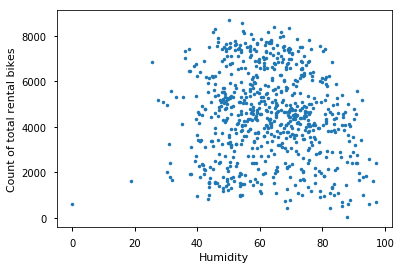

In [8]:
plt.plot(data_df['humidity'],data_df['count_of_total_rental_bikes'],'.')
plt.xlabel("Humidity")
plt.ylabel("Count of total rental bikes")

Text(0, 0.5, 'Count of total rental bikes')

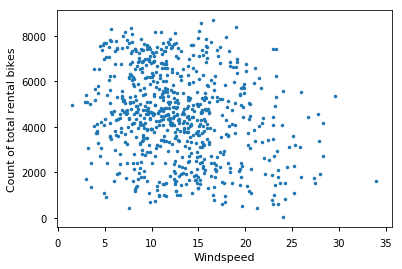

In [9]:
plt.plot(data_df['windspeed'],data_df['count_of_total_rental_bikes'],'.')
plt.xlabel("Windspeed")
plt.ylabel("Count of total rental bikes")

<span style="color:blue">
    
### YOUR ANSWER HERE
As from the above plots(seasons vs count of rental bikes and weather conditions vs count of rental bikes) and numbers for 
analytics, we can draw inference that the people mostly rent bikes in "Fall" season and least in "Spring" season as mean of
total_rental_bikes count is biggest and in spring it's least.People love to bicycle when it's clear and humidity is between 40 to 80 and also when windspeed is between 5 to 15 as we infer from the plotting of both the graph (humidity vs count of rental bikes and windspeed vs and count of rental bikes)that between those distribution interval,as, it has the maximum frequency and count of people renting bicylces at those intervals.Moreover, both the graphs shows distribution of the data through which we can analyse easily. Count of total rental bikes have been increased rapidly to almost double from year 2011 to 2012 as we can deduce it from the statistics as well as graph.People mostly rent bicycle in September and least in January as we can infer from the graph plotted(months vs count of rental bikes) . Moreover, it comes under fall season and we have already deduced that in fall season, highest number of bikes are rented.

</span>

## DATA ANALYSIS

In this section, use your data slicing and dicing skills to come up with specialised analysis on a subset of the data. Let's see if you can answer these specific analysis questions. You are expected to plot appropriate graphs / plots and explain your analysis (using Markdown text) wherever necessary. 

### 1. Is there any relationship between weather situation / outside temperature and the number of bikes rented on a given day? 
<span style= 'float: right;'><b>[10 marks]</b></span>

Text(0, 0.5, 'Count of total rental bikes')

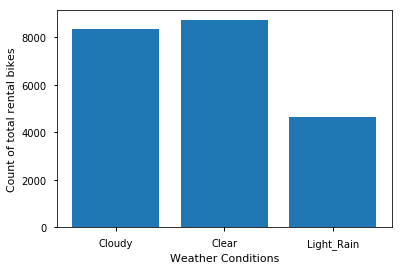

In [10]:
# YOUR CODE HERE
plt.bar(data_df['weather_situation'],data_df['count_of_total_rental_bikes'])
plt.xlabel("Weather Conditions")
plt.ylabel("Count of total rental bikes")
# (ADD ANY ADDITIONAL CELLS AS REQUIRED)

Text(0, 0.5, 'Count of total rental bikes')

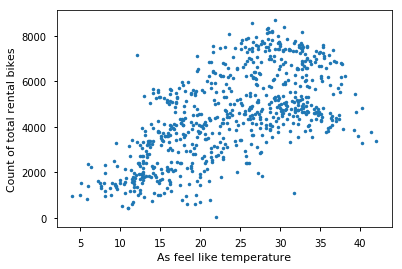

In [11]:
plt.plot(data_df['atemp'],data_df['count_of_total_rental_bikes'],'.')
plt.xlabel("As feel like temperature")
plt.ylabel("Count of total rental bikes")

Text(0, 0.5, 'Count of total rental bikes')

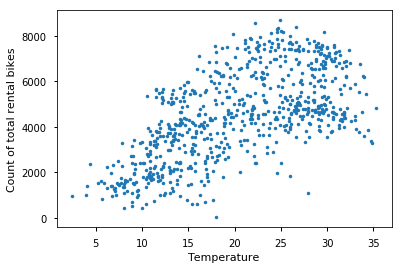

In [12]:
#plt.plot(data_df['temp'],data_df['count_of_total_users'],'.')
plt.plot(data_df['temp'], data_df['count_of_total_rental_bikes'],".")
plt.xlabel("Temperature")
plt.ylabel("Count of total rental bikes")

<span style="color:blue">
    
### YOUR ANSWER HERE
Yes, there is an relation between weather_situation / outside temperature and number of bikes rented on that day. Here, in the
plot of weather_situation and number of bikes, frequency of renting bikes on a day having clear weather is highest and for the
light rain, it's lowest. In the distribution graph of temperature vs count of total rental bikes, we can clearly see that most
of the high frequency points are scattered in the range of 20 to 30 degree and 25 to 35 in as feel like temperature vs count of
rental bikes graph and we can infer that the most of the bikes were rented between the 20 to 30 degree.

</span>

### 2. Is there any relationship between the day of the week / holiday and the number of bikes rented on a given day?
<span style= 'float: right;'><b>[10 marks]</b></span>

{'whiskers': [<matplotlib.lines.Line2D at 0x235540f45f8>,
 'caps': [<matplotlib.lines.Line2D at 0x235540f4c88>,
 'boxes': [<matplotlib.lines.Line2D at 0x235540f41d0>,
 'medians': [<matplotlib.lines.Line2D at 0x23555103358>,
 'fliers': [<matplotlib.lines.Line2D at 0x235551036a0>,
 'means': []}

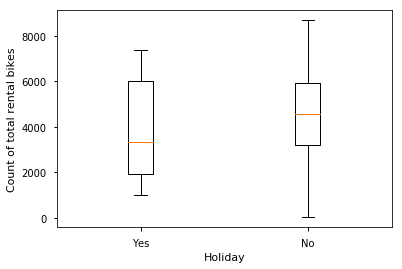

In [13]:
# YOUR CODE HERE
df_yes1 = data_df[data_df['holiday'] == "Yes"]
df_no1 = data_df[data_df['holiday'] == "No"]
plt.xlabel("Holiday")
plt.ylabel("Count of total rental bikes")
plt.boxplot([list(df_yes1['count_of_total_rental_bikes']), list(df_no1['count_of_total_rental_bikes'])], labels = ["Yes", "No"])# (ADD ANY ADDITIONAL CELLS AS REQUIRED)

{'whiskers': [<matplotlib.lines.Line2D at 0x2355516bd30>,
 'caps': [<matplotlib.lines.Line2D at 0x23555170400>,
 'boxes': [<matplotlib.lines.Line2D at 0x2355516b908>,
 'medians': [<matplotlib.lines.Line2D at 0x23555170a90>,
 'fliers': [<matplotlib.lines.Line2D at 0x23555170dd8>,
 'means': []}

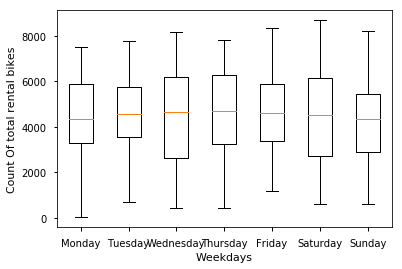

In [14]:
df_day1 = data_df[data_df['weekday'] == "Monday"]
df_day2 = data_df[data_df['weekday'] == "Tuesday"]
df_day3 = data_df[data_df['weekday'] == "Wednesday"]
df_day4 = data_df[data_df['weekday'] == "Thursday"]
df_day5 = data_df[data_df['weekday'] == "Friday"]
df_day6 = data_df[data_df['weekday'] == "Saturday"]
df_day7 = data_df[data_df['weekday'] == "Sunday"]
plt.xlabel("Weekdays")
plt.ylabel("Count Of total rental bikes")
plt.boxplot([list(df_day1['count_of_total_rental_bikes']), list(df_day2['count_of_total_rental_bikes']), list(df_day3['count_of_total_rental_bikes']),list(df_day4['count_of_total_rental_bikes']),list(df_day5['count_of_total_rental_bikes']),list(df_day6['count_of_total_rental_bikes']),list(df_day7['count_of_total_rental_bikes']) ], labels= ["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"])

<span style="color:blue">
    
### YOUR ANSWER HERE
Yes, there is an relation between holiday and Count_of_users. From the graph, we can clearly infer that frequency of bike renting
was highest and lowest on the days when it's not a holiday.There is a relation between the weekday and Count_of_users. 
From the graph, it can be deduced that maximum frequency has gone on Saturday and minimum on Monday.
</span>

### 3. How do the number of registered and casual users vary with respect to each other during holidays and work days? 
<span style= 'float: right;'><b>[15 marks]</b></span>

{'whiskers': [<matplotlib.lines.Line2D at 0x2355527d390>,
 'caps': [<matplotlib.lines.Line2D at 0x2355527da20>,
 'boxes': [<matplotlib.lines.Line2D at 0x2355526df60>,
 'medians': [<matplotlib.lines.Line2D at 0x2355527de48>,
 'fliers': [<matplotlib.lines.Line2D at 0x23555287438>,
 'means': []}

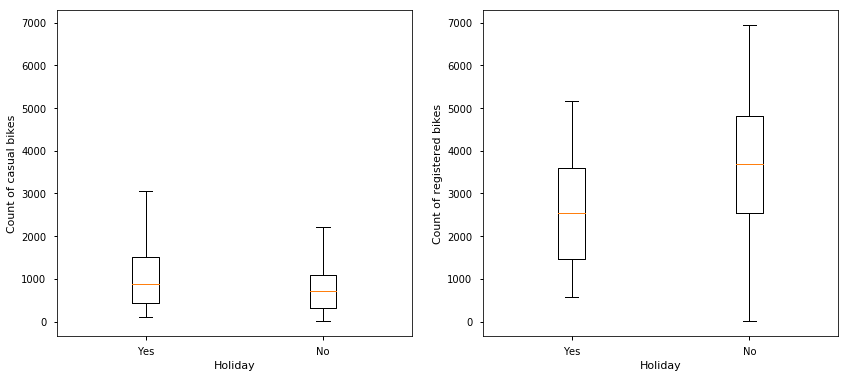

In [15]:
# YOUR CODE HERE
fig2 = plt.figure(figsize=(14,6))
ax1 = plt.subplot(1,2,1)
df_yes2 = data_df[data_df['holiday'] == "Yes"]
df_no2 = data_df[data_df['holiday'] == "No"]
ax1.set_xlabel("Holiday")
ax1.set_ylabel("Count of casual bikes")
plt.boxplot([list(df_yes2['count_of_casual_users']), list(df_no2['count_of_casual_users'])], labels = ["Yes","No"])
ax2 = plt.subplot(1,2,2,sharey=ax1)
ax2.set_xlabel("Holiday")
ax2.set_ylabel("Count of registered bikes")
plt.boxplot([list(df_yes2['count_of_registered_users']), list(df_no2['count_of_registered_users'])] , labels = ["Yes","No"])
# (ADD ANY ADDITIONAL CELLS AS REQUIRED)

{'whiskers': [<matplotlib.lines.Line2D at 0x23555317320>,
 'caps': [<matplotlib.lines.Line2D at 0x235553179b0>,
 'boxes': [<matplotlib.lines.Line2D at 0x2355530aef0>,
 'medians': [<matplotlib.lines.Line2D at 0x23555317dd8>,
 'fliers': [<matplotlib.lines.Line2D at 0x235553213c8>,
 'means': []}

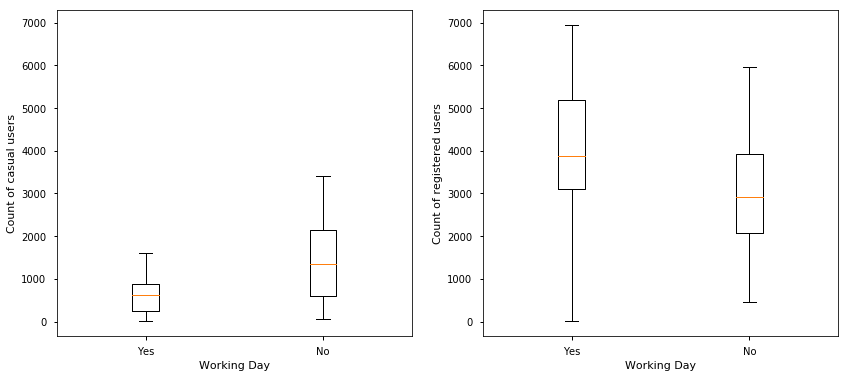

In [16]:
fig2 = plt.figure(figsize=(14,6))
ax1 = plt.subplot(1,2,1)
df_yes2 = data_df[data_df['workingday'] == "Yes"]
df_no2 = data_df[data_df['workingday'] == "No"]
ax1.set_xlabel("Working Day")
ax1.set_ylabel("Count of casual users")
plt.boxplot([list(df_yes2['count_of_casual_users']), list(df_no2['count_of_casual_users'])], labels = ["Yes","No"])
ax2 = plt.subplot(1,2,2,sharey=ax1)
ax2.set_xlabel("Working Day")
ax2.set_ylabel("Count of registered users")
plt.boxplot([list(df_yes2['count_of_registered_users']), list(df_no2['count_of_registered_users'])] , labels = ["Yes","No"])

<span style="color:blue">
    
### YOUR ANSWER HERE
From the graph we can draw conclusion that count of hiring casual bikes in holidays are more than that when there is not a holiday.In the count of registered bikes vs holidays, count of hiring a registered is more in when there is not holidays. But if we compare both of the graphs, we can draw inference that people prefer registered bikes whether there is a holiday or not.
In both the graphs for working days, there the exact inverted replica's of the both the graphs for holidays because if there is holiday, then it wouldn't be a working day and viceversa. So, from working day's graph , we can conclude that the count of hiring casual bikes in non working day are more than that when there is a working day .In the count of registered bikes vs workingdays, count of hiring a registered is more in when there is a working day. But if we compare both of the graphs, we can draw inference that people prefer registered bikes whether there is a working day or not.

</span>

### 4. What relationship can you find among the attributes relating to weather in this dataset?
<span style= 'float: right;'><b>[6 marks]</b></span>

{'whiskers': [<matplotlib.lines.Line2D at 0x235553a3eb8>,
 'caps': [<matplotlib.lines.Line2D at 0x235553af588>,
 'boxes': [<matplotlib.lines.Line2D at 0x235553a3a90>,
 'medians': [<matplotlib.lines.Line2D at 0x235553afc18>,
 'fliers': [<matplotlib.lines.Line2D at 0x235553aff60>,
 'means': []}

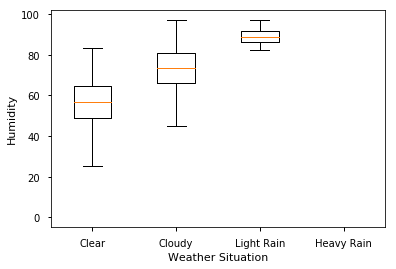

In [17]:
# YOUR CODE HERE
df_clear = data_df[data_df['weather_situation'] == "Clear"]
df_cloudy = data_df[data_df['weather_situation'] == "Cloudy"]
df_light_rain = data_df[data_df['weather_situation'] == "Light_Rain"]
df_heavy_rain = data_df[data_df['weather_situation'] == "Heavy_Rain"]
plt.xlabel("Weather Situation")
plt.ylabel("Humidity")
plt.boxplot([list(df_clear['humidity']), list(df_cloudy['humidity']), list(df_light_rain['humidity']), list(df_heavy_rain['humidity'])], labels= ["Clear","Cloudy","Light Rain","Heavy Rain"])
# (ADD ANY ADDITIONAL CELLS AS REQUIRED)

{'whiskers': [<matplotlib.lines.Line2D at 0x23555431f98>,
 'caps': [<matplotlib.lines.Line2D at 0x2355543e940>,
 'boxes': [<matplotlib.lines.Line2D at 0x23555431e48>,
 'medians': [<matplotlib.lines.Line2D at 0x2355543efd0>,
 'fliers': [<matplotlib.lines.Line2D at 0x23555449358>,
 'means': []}

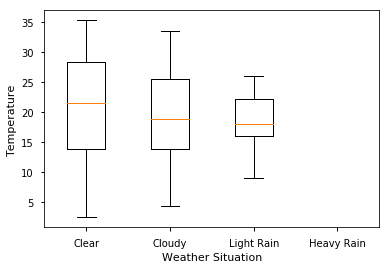

In [18]:
df_clear = data_df[data_df['weather_situation'] == "Clear"]
df_cloudy = data_df[data_df['weather_situation'] == "Cloudy"]
df_light_rain = data_df[data_df['weather_situation'] == "Light_Rain"]
df_heavy_rain = data_df[data_df['weather_situation'] == "Heavy_Rain"]
plt.xlabel("Weather Situation")
plt.ylabel("Temperature")
plt.boxplot([list(df_clear['temp']), list(df_cloudy['temp']), list(df_light_rain['temp']), list(df_heavy_rain['temp'])], labels= ["Clear","Cloudy","Light Rain","Heavy Rain"])

<span style="color:blue">
    
### YOUR ANSWER HERE
There is a relationship among the weather attributes. As we can see in the graph of weather situation vs humidity that on clear day, there is very less humidity and highest humidity is found in Light Rain weather. However, there is graph just below it which shows the relationship between weather situation and temperature and we can conclude that on clear day, it can be extreme , either it can be too hot or too cold but in light rain weather sitaution, temperature ranges between 10 to 25 which quiet less than cloudy and clear weather and it's more pleasent.


</span>

### 5. From this dataset, find out something that this data doesn’t show you directly, but you find interesting about this dataset.
<span style= 'float: right;'><b>[14 marks]</b></span>

{'whiskers': [<matplotlib.lines.Line2D at 0x23555666940>,
 'caps': [<matplotlib.lines.Line2D at 0x23555666fd0>,
 'boxes': [<matplotlib.lines.Line2D at 0x23555666518>,
 'medians': [<matplotlib.lines.Line2D at 0x2355566f6a0>,
 'fliers': [<matplotlib.lines.Line2D at 0x2355566f9e8>,
 'means': []}

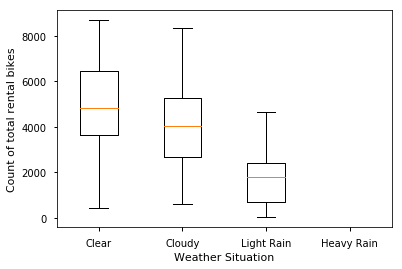

In [19]:
# YOUR CODE HERE
df_clear = data_df[data_df['weather_situation'] == "Clear"]
df_cloudy = data_df[data_df['weather_situation'] == "Cloudy"]
df_light_rain = data_df[data_df['weather_situation'] == "Light_Rain"]
df_heavy_rain = data_df[data_df['weather_situation'] == "Heavy_Rain"]
plt.xlabel("Weather Situation")
plt.ylabel("Count of total rental bikes")
plt.boxplot([list(df_clear['count_of_total_rental_bikes']), list(df_cloudy['count_of_total_rental_bikes']), list(df_light_rain['count_of_total_rental_bikes']), list(df_heavy_rain['count_of_total_rental_bikes'])] , labels= ["Clear","Cloudy","Light Rain","Heavy Rain"])# (ADD ANY ADDITIONAL CELLS AS REQUIRED)

Count_of_rent_bikes_in _2011:  3405.7616438356163
Count_of_rent_bikes_in _2012:  5599.934426229508


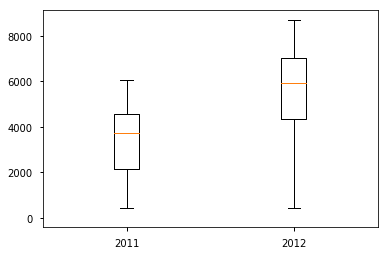

In [20]:
df_yes = data_df[data_df['year'] == 2011]
df_no = data_df[data_df['year'] == 2012]
plt.boxplot([list(df_yes['count_of_total_rental_bikes']), list(df_no['count_of_total_rental_bikes'])] , labels = ["2011", "2012"])
data_2012=data_df['count_of_total_rental_bikes'][365:].mean()
data_2011=data_df['count_of_total_rental_bikes'][:365].mean()
print("Count_of_rent_bikes_in _2011: ",data_2011)
print("Count_of_rent_bikes_in _2012: ",data_2012)

In [21]:
r = data_df['count_of_registered_users'] - data_df['count_of_casual_users']
r.sort_values()

246    -102
184     -87
92      -53
667      18
512      25
148      78
183      85
724     133
358     148
77      269
0       323
462     353
327     375
64      377
78      377
26      401
725     423
25      438
71      453
91      456
359     457
301     513
691     515
99      519
68      531
50      534
84      534
1       539
105     553
329     570
       ... 
607    5369
558    5382
660    5398
571    5407
615    5414
523    5418
578    5432
632    5434
501    5442
613    5448
656    5493
655    5503
703    5504
642    5546
663    5609
619    5627
629    5667
654    5690
621    5696
620    5770
661    5784
628    5842
633    5848
635    5891
649    5902
627    6015
662    6103
641    6116
648    6131
634    6159
Length: 731, dtype: int64

<span style="color:blue">
    
### YOUR ANSWER HERE
Interesting thing in this data is that although, 4 is assigned for heavy rain, but their wasn't heavy rain in 2011 and 2012. Moreover, the count of rental bikes were almost double in 2012 as compared to 2011 as we can clearly see from the graph as well as statistics.In addition to it, in this data , almost every time registered rental bikes are more than casual one.

</span>

## LINEAR REGRESSION

Now comes the fun part! In this section you have to implement a **Linear Regression Model**. Companies like **Mobike** and **AirBike** would like to make some predictions on their sales for the next few years. A linear Regression Model will help them predict the growth of their company in the coming years.

Your job is to implement a Linear Regression Model that predicts the number of bikes rented daily, based on the environmental and seasonal variables. There are multiple ways of doing this in Python. You are free to use any Python modules you like for this implementation. 
<span style= 'float: right;'><b>[25 marks]</b></span>

In [47]:
# YOUR CODE HERE
lm = LinearRegression()
# (ADD ANY ADDITIONAL CELLS AS REQUIRED)

In [48]:
x = data_df[['temp','atemp','windspeed','humidity']]

y = data_df['count_of_total_rental_bikes']

x.head()

,temp,atemp,windspeed,humidity
0,14.110847,18.18125,10.749882,80.5833
1,14.902598,17.68695,16.652113,69.6087
2,8.050924,9.47025,16.636703,43.7273
3,8.200000,10.60610,10.739832,59.0435
4,9.305237,11.46350,12.522300,43.6957


In [55]:
lm.fit(x,y)
print("Coefficent" , lm.coef_)
print("Intercept" , lm.intercept_)

Coefficent [ 51.50764972 102.78304886 -67.59216162 -31.49109752]
Intercept 3860.3684532119396


In [56]:
lm2 = LinearRegression()

x_train , x_test , y_train , y_test = train_test_split(x,y,test_size = 0.3, random_state = 6)

lm2.fit(x_train,y_train)
print("Coefficent" , lm2.coef_)
print("Intercept" , lm2.intercept_)

lm2.score(x_test , y_test)

Coefficent [ 91.00220204  68.95003723 -67.81225622 -32.69324692]
Intercept 3943.7095440858016


0.46501530830649834

In [57]:
sq = np.square(x)

lm3 = LinearRegression()
x3 = np.concatenate((sq, x), axis=1)
lm3.fit(x3,y)
print("Coefficent" , lm3.coef_)
print("Intercept" , lm3.intercept_)

Coefficent [-2.15142281e+01  6.80864225e+00 -2.85228272e-01 -1.18787554e+00
  1.11633504e+03 -4.05465359e+02 -7.70575654e+01  1.05864445e+02]
Intercept -3434.3963323349435


In [54]:
lm4 = LinearRegression()
x_train1 , x_test1 , y_train1 , y_test1 = train_test_split(x3,y,test_size = 0.4, random_state = 6)

lm4.fit(x_train1,y_train1)

print("Coefficent" , lm4.coef_)
print("Intercept" , lm4.intercept_)

print(lm4.score(x_test1 , y_test1))
print(lm4.score(x_train1, y_train1))

Coefficent [-1.77161180e+01  3.80695839e+00 -2.23762074e-01 -1.30130914e+00
  9.40774399e+02 -2.41020656e+02 -7.42457070e+01  1.19870159e+02]
Intercept -4147.123453858293
0.5918310530591093
0.5909493024460049


<span style="color:blue">
    
### YOUR ANSWER HERE
As I have used the machine learning algorithm called linear regression in this particular data, I have splited the data into two parts , i.e, Testing data and Training data. Training data consists of 60 % of the data whereas the testing data consists of 40% of the data. So, after training the data set, when we test the data, it is concluded that it has accuracy of 48.1% and if we use second degree and then calculate the accuracy, then it 34.7%. So, according to me, 48.1% is the accuracy of the data because when can go to third and further degree, it could be that it can give a good accuracy but it could be bad fit and moreover, overfitting could be there. So, I think after second degree, it shouldn't be implemented.

</span>